# “We” and “I” Word Frequency Analysis #

This analysis examined the identity recognition of Hongkongers and mainland Chinese during Anti-ELAB movement from 2019 to 2020 in Hong Kong. I explored the possibility of curating a dialogue via artwork. Following a qualitative approach, I interviewed Hongkongers and mainland Chinese.

In reviewing the transcripts, I found that interviewees from Hong Kong tend to use more “we” instead of “I” than interviewees from mainland China. This might suggest the group identity as Hongkongers has been reinforced. To understand the group identity recognition, a paired sample t test was used to compare the group difference of the frequency of using “I” and “We” in the interview transcripts. The result suggests an **enhanced group identity of Hongkongers than mainland Chinese** by analyzing the frequency of people using “we” and “I”. 

In [192]:
import pandas as pd
import numpy as np
from scipy import stats

#Read the csv file and check the descriptive statistics
df = pd.read_csv('IandWe.csv')
df = df.set_index('subject')
df.groupby('Origin').mean()

,Origin,I,We
subject,,,
1,Hongkongers,61,11
2,Hongkongers,25,10
3,Hongkongers,34,5
4,Hongkongers,44,11
5,Hongkongers,46,7
6,Hongkongers,37,12
7,MC,47,1
8,MC,43,0
9,MC,77,4


In [187]:
#Seperate the data into 4 datasets grouped by "HK" "MC" "We" "I"
hk_I = df[df['Origin']=='HK']['I']
mc_I = df[df['Origin']=='MC']['I']
hk_We = df[df['Origin']=='HK']['We']
mc_We = df[df['Origin']=='MC']['We']

#Paired t test to test if there are significant differences of Hongkongers and mainland Chinese used "I" and "We"
I = stats.ttest_ind(hk_I, mc_I, equal_var = False)
We = stats.ttest_ind(hk_We, mc_We, equal_var = False)
p = [I[1],We[1]]
p

[0.38696263583653856, 0.001152872099989596]

<IPython.core.display.Javascript object>


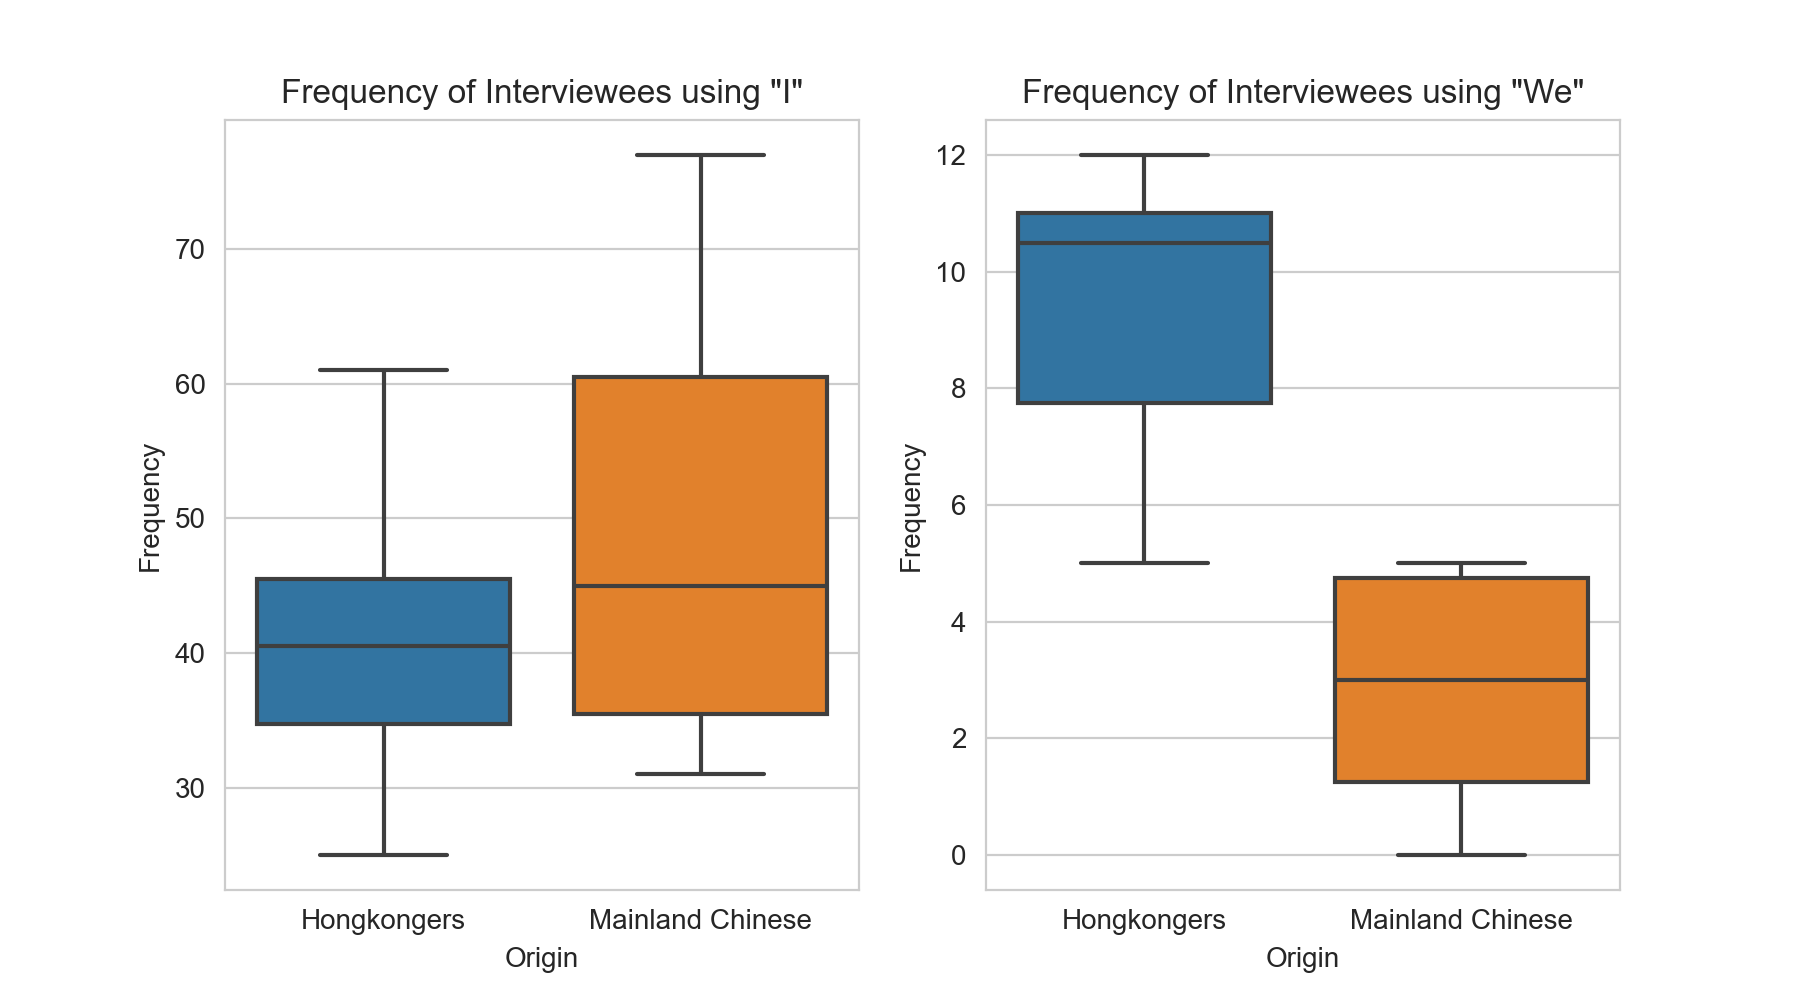

Text(0, 0.5, 'Frequency')

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

df = df.replace('HK', 'Hongkongers')
df = df.replace('MC', 'Mainland Chinese')

sns.set_style("whitegrid")
fig = plt.figure(figsize = (9,5))
fig.tight_layout(pad=5.0)
plt.subplot(121)
plotI = sns.boxplot(y='I',x='Origin', data=df)
plotI.set_title('Frequency of Interviewees using "I"')
plt.ylabel("Frequency")
plt.subplot(122)
plotWe = sns.boxplot(y='We',x='Origin',data=df)
plotWe.set_title('Frequency of Interviewees using "We"')
plt.ylabel("Frequency")